# Informação

- 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- 2 sex - student's sex (binary: 'F' - female or 'M' - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



pd.options.display.float_format = '{:.0f}'.format

In [151]:
student_mat = pd.read_csv("student-mat.csv", sep=';')
student_por = pd.read_csv("student-por.csv", sep=';')

student_grades = pd.concat([student_mat, student_por], ignore_index=True)

# Através da análise da correlação os atributos mais influentes eram:
### (Numéricos):
- tempo de estudo
- nível de educação do pai 
- nível de educação da mãe
- chumbos prévios
- idade
- consumo de alcool
- tempo de viagem
### (Categóricos):
- suporte educacional fora de escola
- a pretensão de seguir para o superior 
- lugar da sua habitação
- escola
- trabalho da mãe
- escolha da escola
- internet

In [152]:
# obter os elementos listados em cima
students_grades_selected = student_grades[["studytime","Fedu","Medu","failures","age","Dalc","traveltime","schoolsup","higher","address","school","Mjob","reason","internet","G3"]]
y = student_grades['G3']

valores_numericos = ['studytime', 'Fedu', 'Medu', 'failures', 'age', 'Dalc', 'traveltime','G3']
valores_categoricos = ['schoolsup', 'higher', 'address', 'school', 'Mjob', 'reason', 'internet']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), valores_numericos),
        ('cat', OneHotEncoder(), valores_categoricos)
    ]
)

students_grades_selected_transf = preprocessor.fit_transform(students_grades_selected)

/var/folders/_b/s2l7ndj94sn0dxd8kq17mchh0000gp/T/ipykernel_18364/1667367247.py:2: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


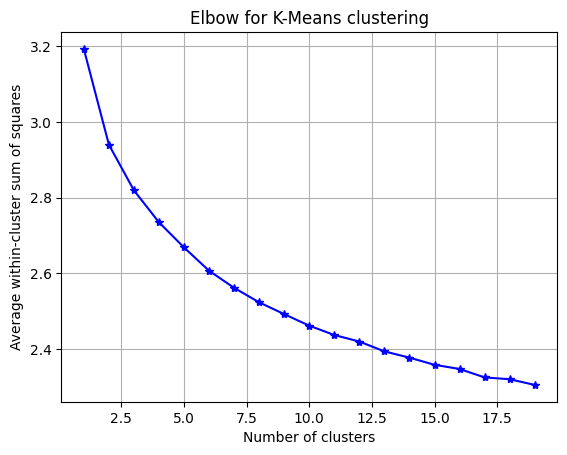

In [153]:
from math import sqrt
from scipy.stats.stats import pearsonr
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist


# ver o melhor número de clusters a usar
K = range(1,20)
KM = [kmeans(students_grades_selected_transf,k) for k in K] # apply kmeans 1 to 10

euclidean_centroid = [cdist(students_grades_selected_transf, centroid, 'euclidean') for (centroid,var) in KM]
dist = [np.min(D,axis=1) for D in euclidean_centroid]

avgWithinSS = [sum(d)/students_grades_selected_transf.shape[0] for d in dist]

# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')
plt.show()


In [154]:
kmeans = KMeans(3, init='k-means++', random_state = 20) 

kmeans.fit(students_grades_selected_transf)

KMeans(n_clusters=3, random_state=20)

In [155]:
students_grades_selected['segmento'] = kmeans.predict(students_grades_selected_transf)


/var/folders/_b/s2l7ndj94sn0dxd8kq17mchh0000gp/T/ipykernel_18364/1196407440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_grades_selected['segmento'] = kmeans.predict(students_grades_selected_transf)


In [156]:
display(students_grades_selected)

,studytime,Fedu,Medu,failures,age,Dalc,traveltime,schoolsup,higher,address,school,Mjob,reason,internet,G3,segmento
0,2,4,4,0,18,1,2,yes,yes,U,GP,at_home,course,no,6,2
1,2,1,1,0,17,1,1,no,yes,U,GP,at_home,course,yes,6,1
2,2,1,1,3,15,2,1,yes,yes,U,GP,at_home,other,yes,10,0
3,3,2,4,0,15,1,1,no,yes,U,GP,health,home,yes,15,2
4,2,3,3,0,16,1,1,no,yes,U,GP,other,home,no,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,3,3,2,1,19,1,1,no,yes,R,MS,services,course,yes,10,0
1040,2,1,3,0,18,1,1,no,yes,U,MS,teacher,course,yes,16,1
1041,2,1,1,0,18,1,2,no,yes,U,MS,other,course,no,9,1
1042,1,1,3,0,17,3,2,no,yes,U,MS,services,course,yes,10,1


In [157]:
students_grades_selected.groupby('segmento').G3.mean()

clust_map = {
       0:'Aluno baixa performance',
       1:'Aluno média performance',
       2:'Aluno alta performance',
   }


In [158]:
students_grades_selected.groupby('segmento').age.mean()

segmento
0   18
1   17
2   16
Name: age, dtype: float64

In [159]:
students_grades_selected.groupby('segmento').failures.sum()

segmento
0    233
1     23
2     20
Name: failures, dtype: int64

In [160]:
students_grades_selected.groupby('segmento').Medu.mean()

segmento
0   2
1   2
2   4
Name: Medu, dtype: float64

In [161]:
students_grades_selected.segmento = students_grades_selected.segmento.map(clust_map)
students_grades_selected[:10]


/var/folders/_b/s2l7ndj94sn0dxd8kq17mchh0000gp/T/ipykernel_18364/2499125807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_grades_selected.segmento = students_grades_selected.segmento.map(clust_map)


,studytime,Fedu,Medu,failures,age,Dalc,traveltime,schoolsup,higher,address,school,Mjob,reason,internet,G3,segmento
0,2,4,4,0,18,1,2,yes,yes,U,GP,at_home,course,no,6,Aluno alta performance
1,2,1,1,0,17,1,1,no,yes,U,GP,at_home,course,yes,6,Aluno média performance
2,2,1,1,3,15,2,1,yes,yes,U,GP,at_home,other,yes,10,Aluno baixa performance
3,3,2,4,0,15,1,1,no,yes,U,GP,health,home,yes,15,Aluno alta performance
4,2,3,3,0,16,1,1,no,yes,U,GP,other,home,no,10,Aluno alta performance
5,2,3,4,0,16,1,1,no,yes,U,GP,services,reputation,yes,15,Aluno alta performance
6,2,2,2,0,16,1,1,no,yes,U,GP,other,home,yes,11,Aluno média performance
7,2,4,4,0,17,1,2,yes,yes,U,GP,other,home,no,6,Aluno alta performance
8,2,2,3,0,15,1,1,no,yes,U,GP,services,home,yes,19,Aluno alta performance
9,2,4,3,0,15,1,1,no,yes,U,GP,other,home,yes,15,Aluno alta performance


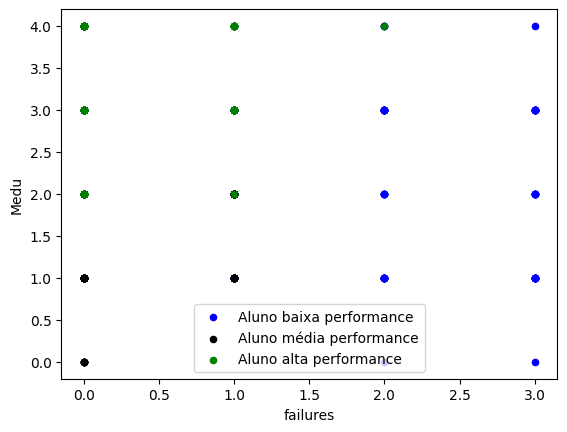

In [162]:
d_color = {
       'Aluno baixa performance':'b',
       'Aluno média performance':'k',
       'Aluno alta performance':'g'
   }
fig, ax = plt.subplots()
for clust in clust_map.values():
       color = d_color[clust]
       students_grades_selected[students_grades_selected.segmento == clust].plot(kind='scatter',
            x='failures', y='Medu', label=clust,
            ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, )
plt.show()